In [110]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [111]:
!pip install pdf2image
!pip install easyocr

In [112]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [113]:
reader = easyocr.Reader(['en'])

In [115]:
images = convert_from_path('Resume.pdf')

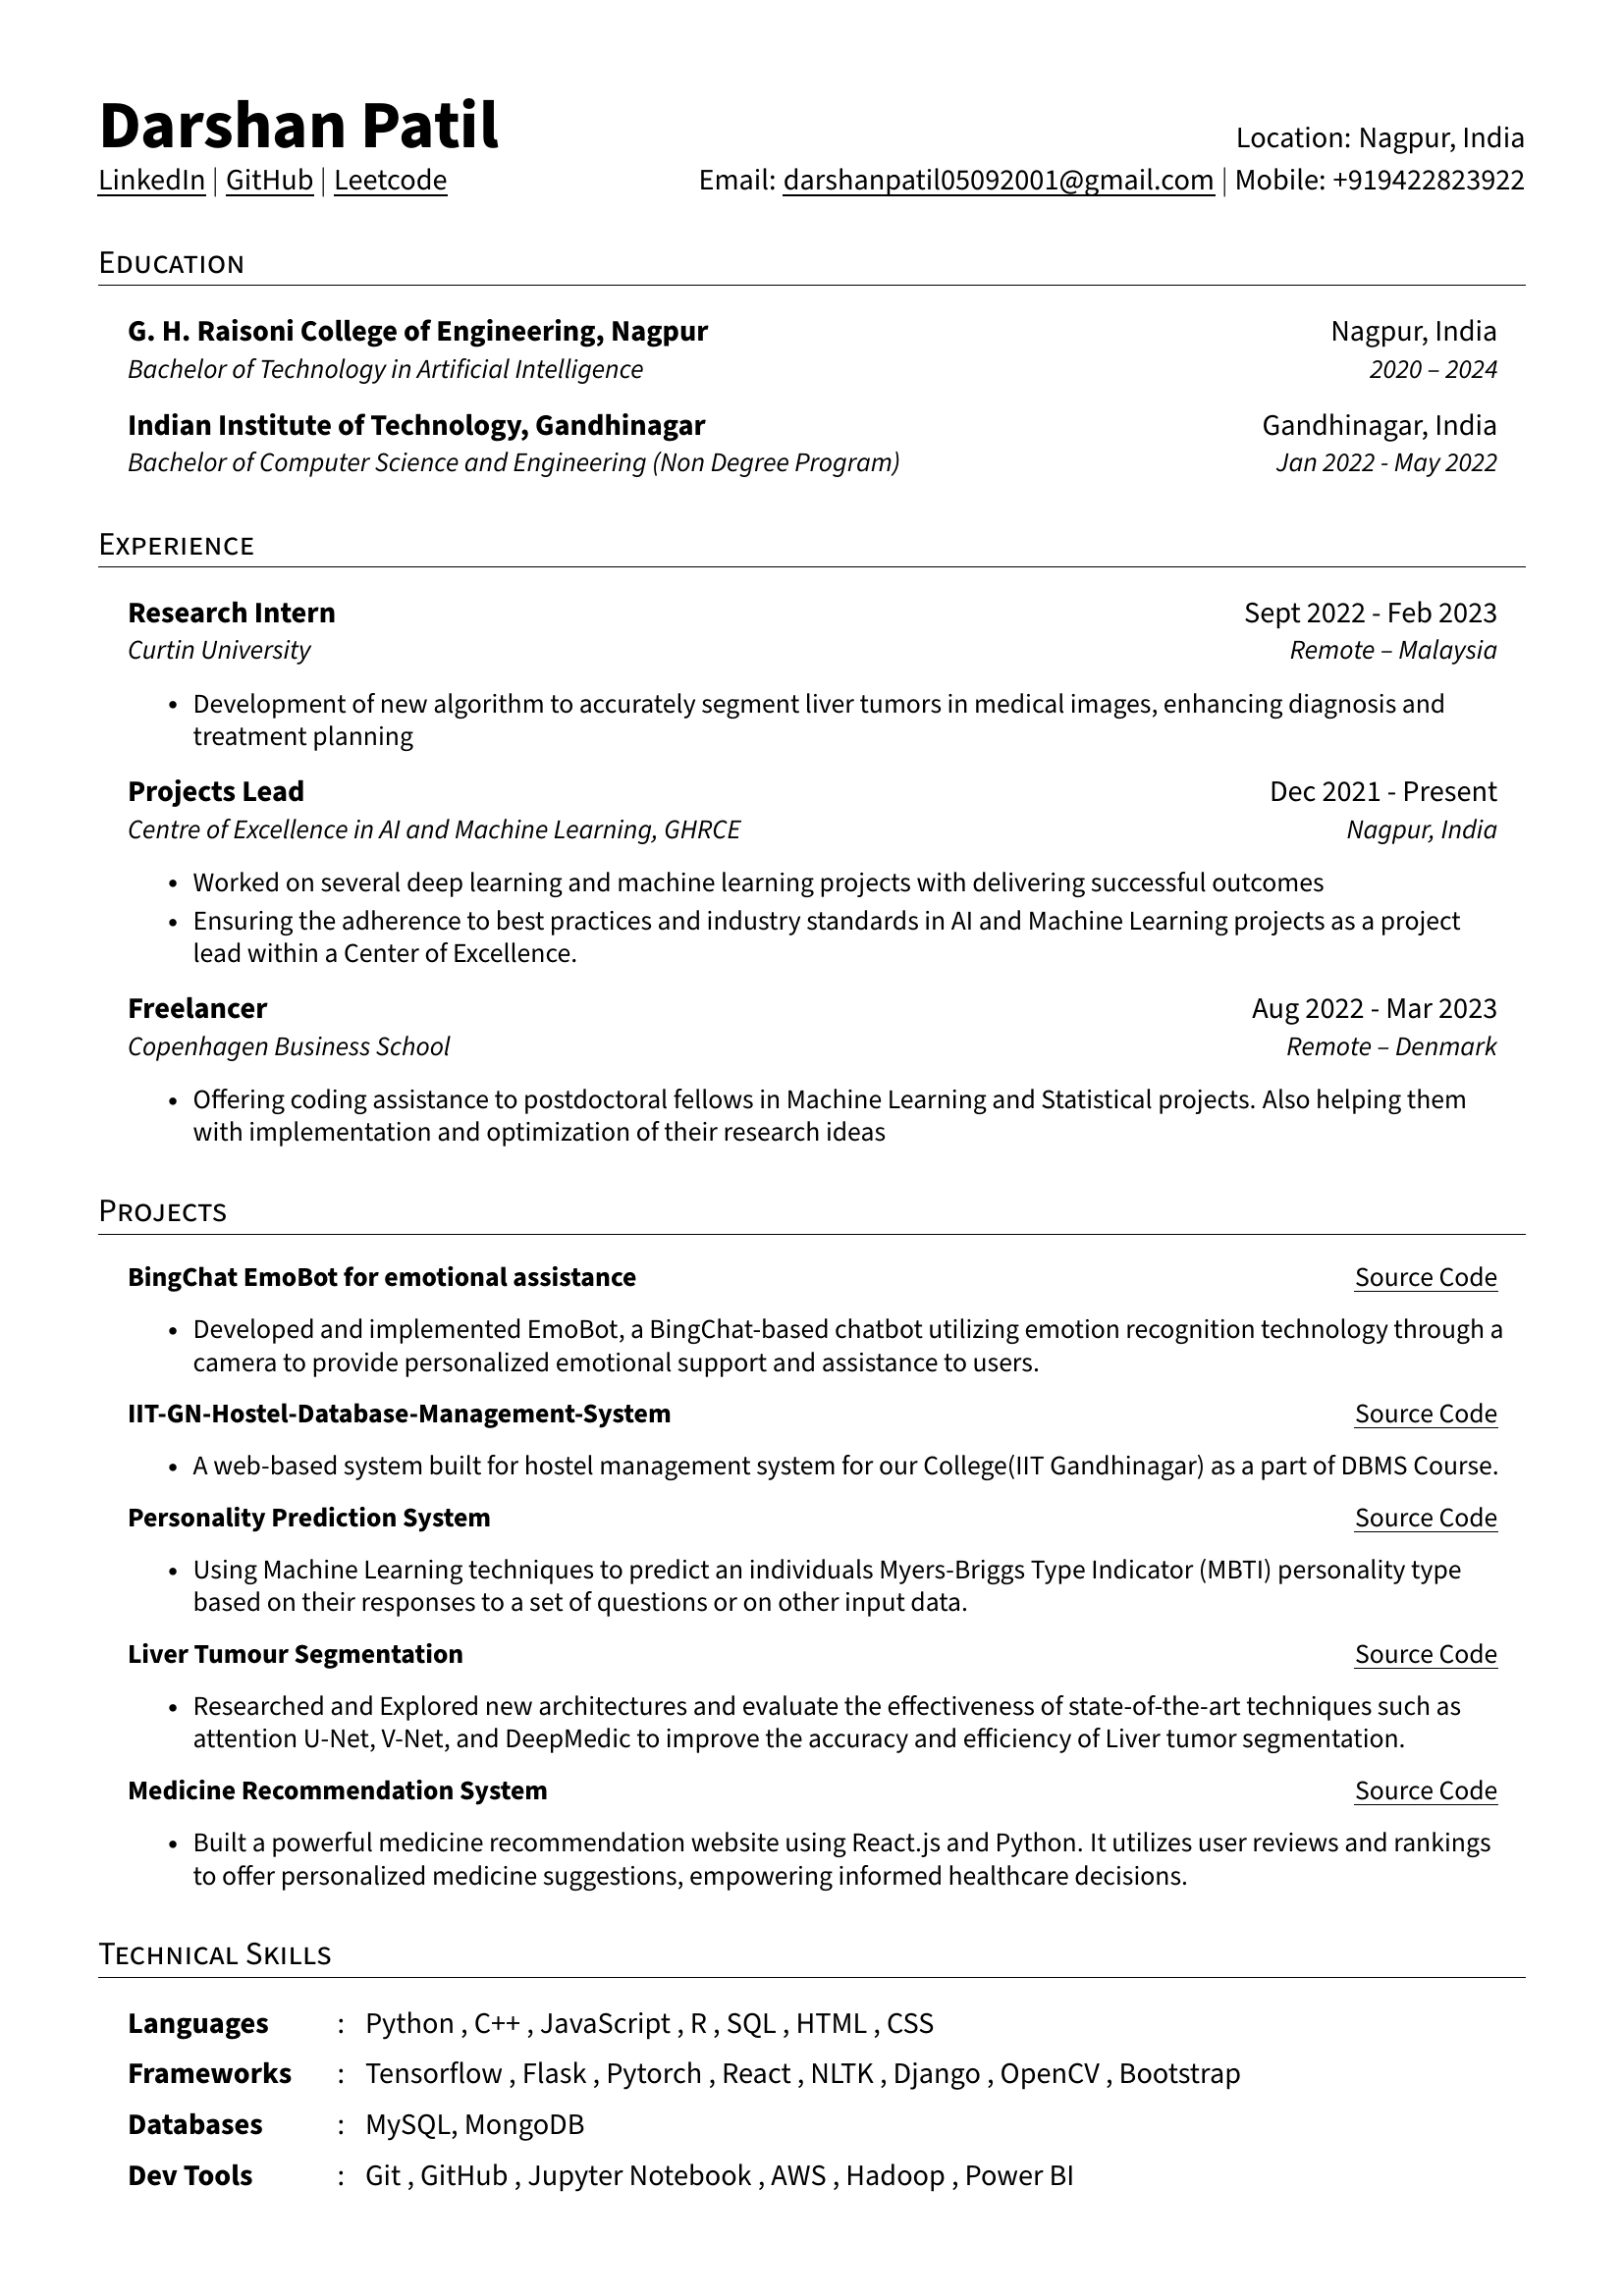

In [116]:
from IPython.display import display, Image
display(images[0])

In [117]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch', beamWidth=10)
bounds

[([[97, 93], [516, 93], [516, 161], [97, 161]],
  'Darshan Patil',
  0.9914790771644155),
 ([[1254, 123], [1559, 123], [1559, 166], [1254, 166]],
  'Location: Nagpur; India',
  0.9798334541545503),
 ([[97, 165], [461, 165], [461, 203], [97, 203]],
  'Linkedln | GitHub | Leetcode',
  0.5321481814385044),
 ([[709, 164], [1559, 164], [1559, 206], [709, 206]],
  'Email: darshanpatil05092001@gmaiLcom | Mobile: +919422823922',
  0.5705796786398423),
 ([[100, 252], [252, 252], [252, 284], [100, 284]],
  'EDUCATION',
  0.9702230120601896),
 ([[127, 318], [727, 318], [727, 363], [127, 363]],
  'G.H. Raisoni College of Engineering, Nagpur',
  0.7077196525564059),
 ([[1352, 321], [1529, 321], [1529, 362], [1352, 362]],
  'Nagpur; India',
  0.7699717129661146),
 ([[127, 360], [661, 360], [661, 397], [127, 397]],
  'Bachelor of Technology in Artificial Intelligence',
  0.9815121759338842),
 ([[1392, 362], [1530, 362], [1530, 392], [1392, 392]],
  '2020 - 2024',
  0.893324177294929),
 ([[127, 413], 

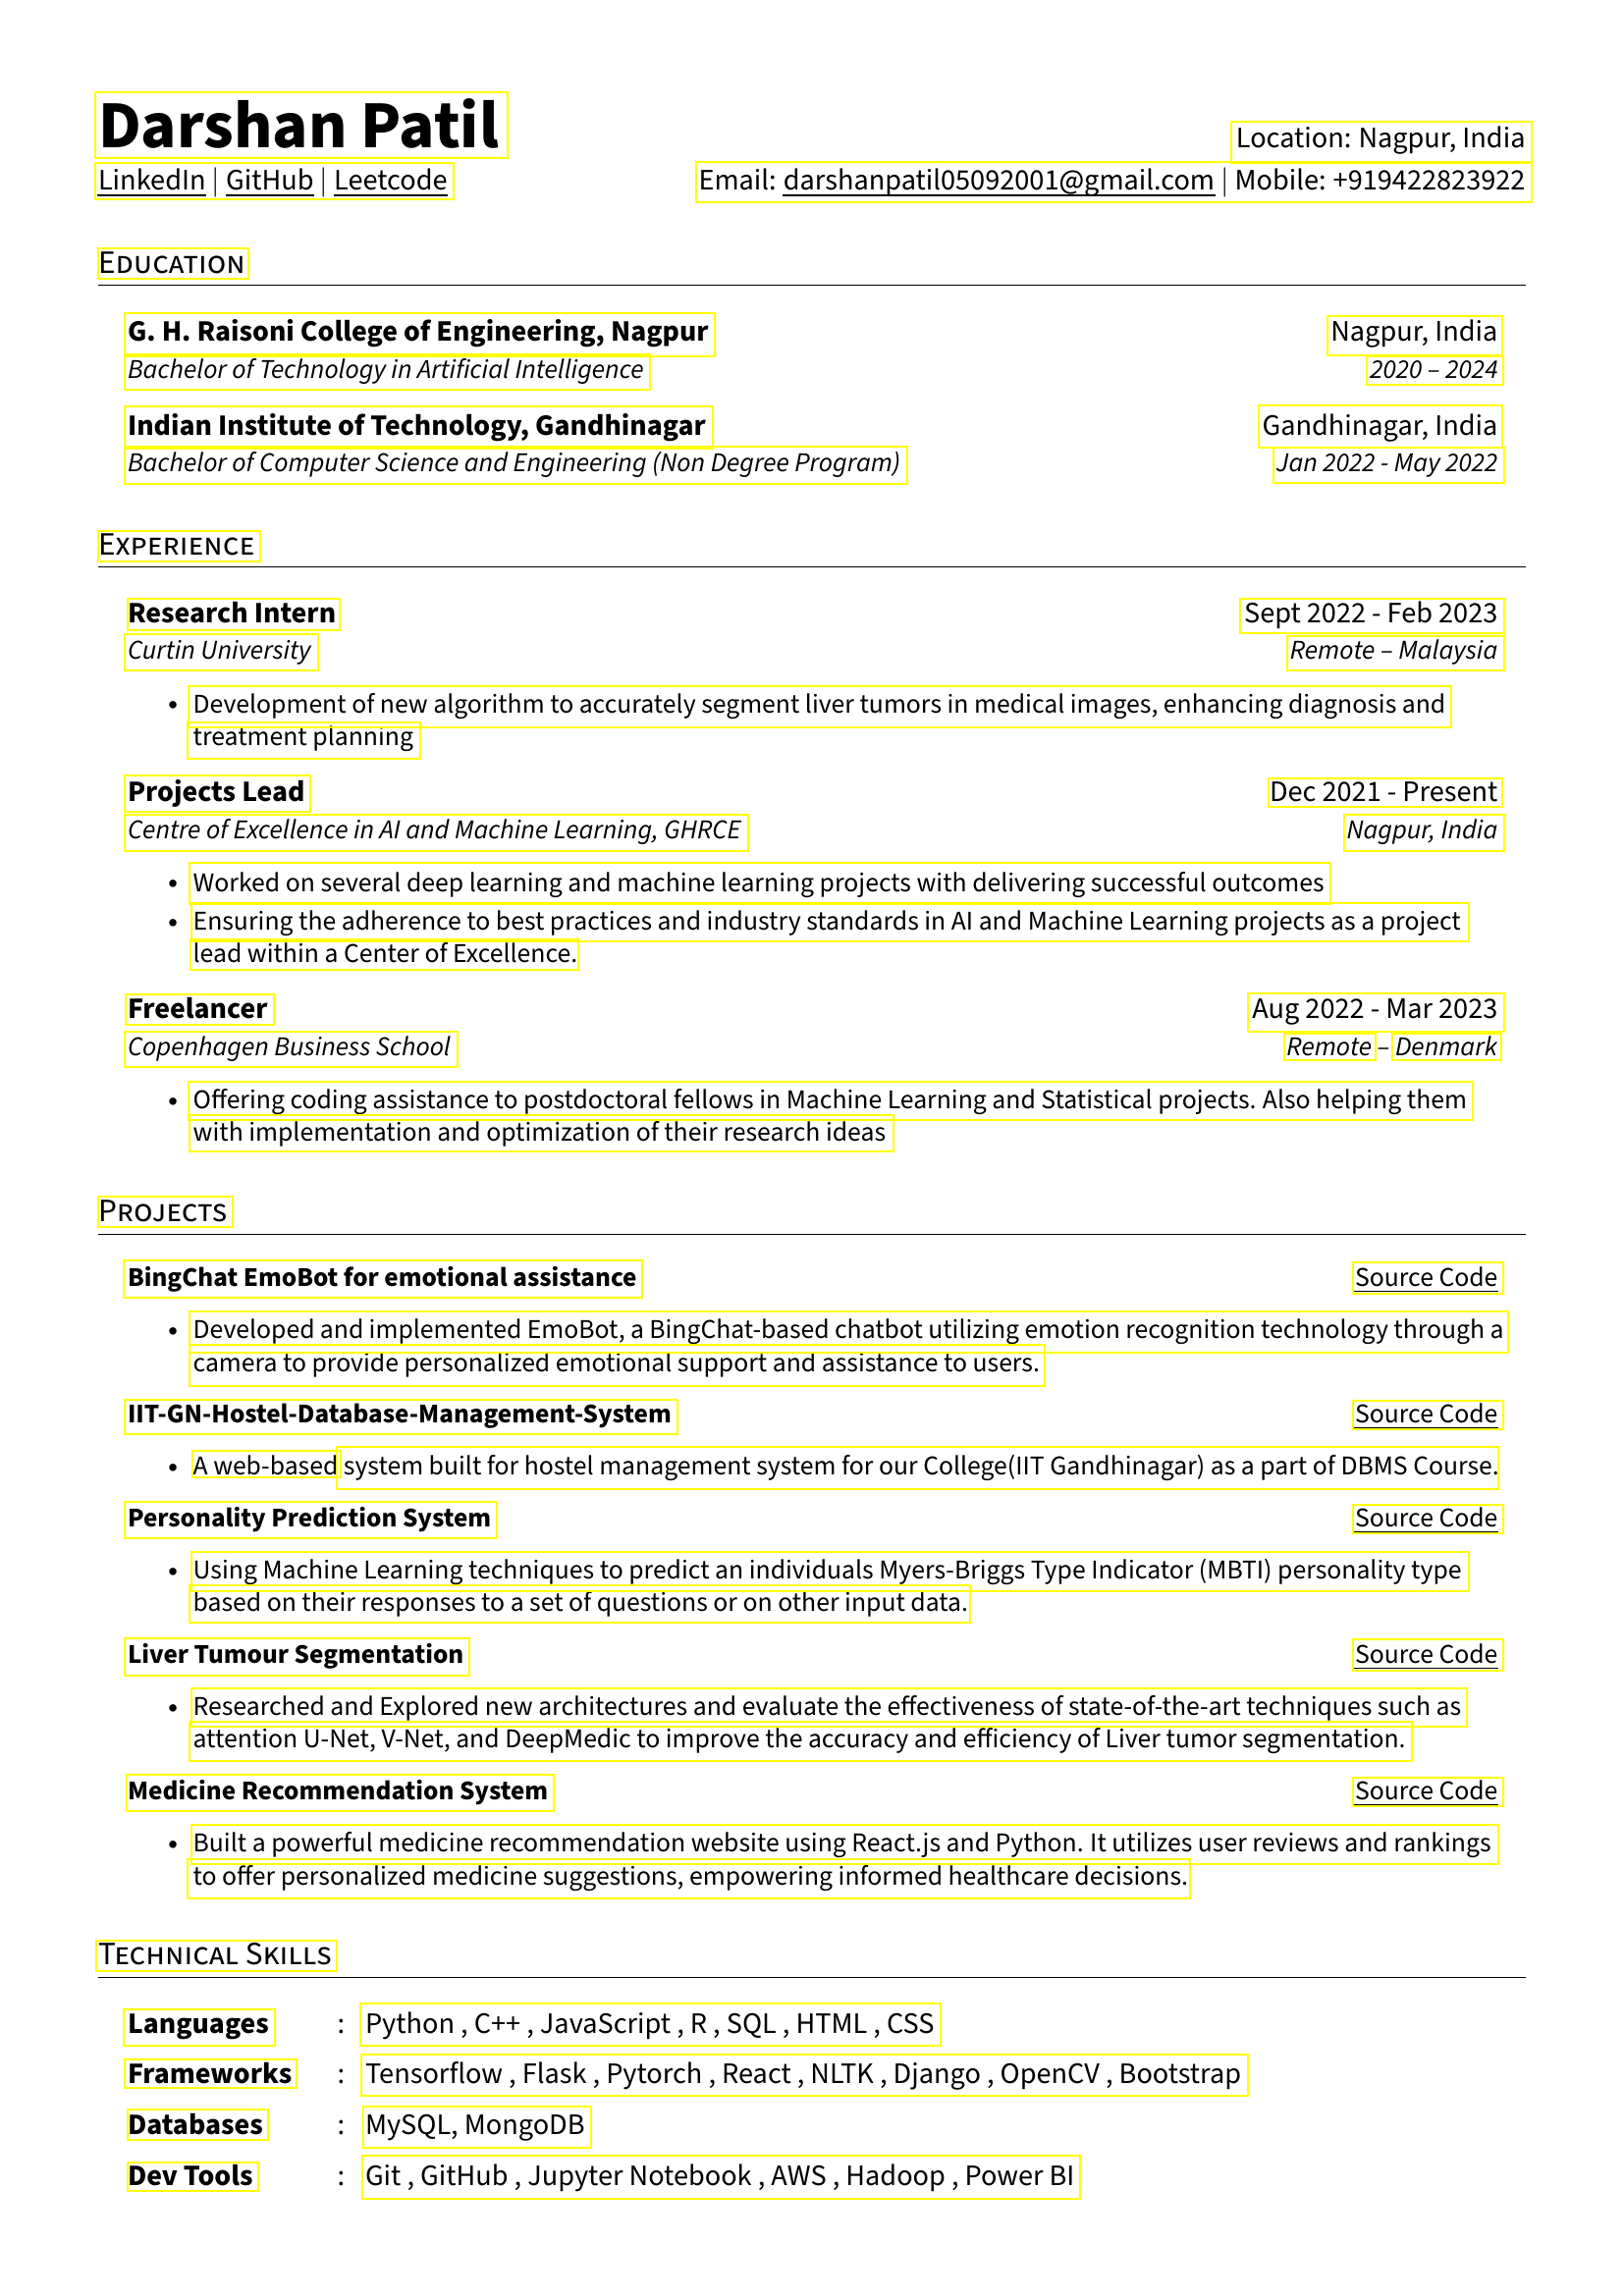

In [118]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(images[0], bounds)

In [119]:
bounds[1][1]

'Location: Nagpur; India'

In [120]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)

Darshan Patil
Location: Nagpur; India
Linkedln | GitHub | Leetcode
Email: darshanpatil05092001@gmaiLcom | Mobile: +919422823922
EDUCATION
G.H. Raisoni College of Engineering, Nagpur
Nagpur; India
Bachelor of Technology in Artificial Intelligence
2020 - 2024
Indian Institute of Technology, Gandhinagar
Gandhinagar; India
Bachelor of Computer Science and Engineering (Non Degree Program)
Jan 2022 - May 2022
ExPERIENCE
Research Intern
Sept 2022 - Feb 2023
Curtin University
Remote - Malaysia
Development ofnew algorithm to accurately segment liver tumors in medical images, enhancing diagnosis and
treatment planning
Projects Lead
Dec 2021 - Present
Centre of Excellence in Al and Machine Learning, GHRCE
Nagpur India
Worked on several deep learning and machine learning projects with delivering successful outcomes
Ensuring the adherence to best practices and industry standards in Al and Machine Learning projects as a project
lead within a Center of Excellence.
Freelancer
Aug 2022 - Mar 2023
Copen

In [121]:
import json

def extract_experience(text):
    experience_data = []
    experiences = text.split("ExPERIENCE\n")[1].strip().split("\n\n")
    keywords_to_stop = ["technical skills", "projects"]

    for experience in experiences:
        details = experience.split("\n")
        #print(details)
        num_experiences = len(details)
        for i in range(0, num_experiences, 5):
          if details[i].lower() in [kw.lower() for kw in keywords_to_stop]:
                break
          if len(details[i]) > 100:  # Check if title is too big (adjust the character limit as needed)
                #i += 1  # Skip the current element if the title is too big
                continue
          title = details[i]
          duration = details[i + 1]
          company = details[i + 2]
          location = details[i + 3] if i + 3 < num_experiences else None
          description = details[i + 4] if i + 4 < num_experiences else None

          experience_data.append({
            "Title": title.strip(),
            "Duration": duration.strip(),
            "Company": company.strip(),
            "Location": location.strip() if location else None,
            "Description": description.strip() if description else None
          })

    return experience_data
# Given text containing the experience details
input_text = text

# Extract the experience data
experience_data = extract_experience(input_text)

# Create the final JSON object
output_json = {
    "Experience": experience_data
}

# Convert the JSON object to a JSON-formatted string
json_string_exp = json.dumps(output_json, indent=2)

# Print the JSON-formatted string
print(json_string_exp)


{
  "Experience": [
    {
      "Title": "Research Intern",
      "Duration": "Sept 2022 - Feb 2023",
      "Company": "Curtin University",
      "Location": "Remote - Malaysia",
      "Description": "Development ofnew algorithm to accurately segment liver tumors in medical images, enhancing diagnosis and"
    },
    {
      "Title": "treatment planning",
      "Duration": "Projects Lead",
      "Company": "Dec 2021 - Present",
      "Location": "Centre of Excellence in Al and Machine Learning, GHRCE",
      "Description": "Nagpur India"
    },
    {
      "Title": "Worked on several deep learning and machine learning projects with delivering successful outcomes",
      "Duration": "Ensuring the adherence to best practices and industry standards in Al and Machine Learning projects as a project",
      "Company": "lead within a Center of Excellence.",
      "Location": "Freelancer",
      "Description": "Aug 2022 - Mar 2023"
    },
    {
      "Title": "Copenhagen Business School",
    

In [122]:
pattern = r"^(.+)\n(.+)\n(.+)\n(.+)$"
matches = re.findall(pattern, education, re.MULTILINE)

data = {
    "education": []
}

# Iterate through each match and construct the JSON data
data["education"] = []  # Initialize the education list in 'data'

keywords_to_stop = ["experience", "technical skills", "project"]

for match in matches:
    if any(keyword.lower() in item.lower() for keyword in keywords_to_stop for item in match):
        break  # Stop the loop if a keyword is found
    institution = {
        "institution": match[0],
        "location": match[1],
        "program": match[2],
        "duration": match[3]
    }
    data["education"].append(institution)


# Convert data to JSON and print
json_data_edu = json.dumps(data, indent=4)
print(json_data_edu)

{
    "education": [
        {
            "institution": "G.H. Raisoni College of Engineering, Nagpur",
            "location": "Nagpur; India",
            "program": "Bachelor of Technology in Artificial Intelligence",
            "duration": "2020 - 2024"
        },
        {
            "institution": "Indian Institute of Technology, Gandhinagar",
            "location": "Gandhinagar; India",
            "program": "Bachelor of Computer Science and Engineering (Non Degree Program)",
            "duration": "Jan 2022 - May 2022"
        }
    ]
}


In [123]:
# Function to extract data using regular expressions
def extract_data(text):
    data = {
        "TechnicalSkills": {}
    }

    # Extract Technical Skills using regex
    tech_skills_pattern = r"TECHNICAL SKILLS\n(.*?)$"
    tech_skills_match = re.search(tech_skills_pattern, text, re.S)
    if tech_skills_match:
        tech_skills_text = tech_skills_match.group(1)
        tech_skills_list = re.findall(r"(\w+)\s*,\s*", tech_skills_text)
        data["TechnicalSkills"]["Languages"] = tech_skills_list[:7]
        data["TechnicalSkills"]["Frameworks"] = tech_skills_list[7:14]
        data["TechnicalSkills"]["Databases"] = tech_skills_list[14:16]
        data["TechnicalSkills"]["DevTools"] = tech_skills_list[16:]

    return data

# Convert extracted data to JSON
json_data_skl = json.dumps(extract_data(text), indent=2)

# Print the JSON data
print(json_data_skl)

{
  "TechnicalSkills": {
    "Languages": [
      "Python",
      "t",
      "JavaScript",
      "R",
      "SQL",
      "HTML",
      "Tensorflow"
    ],
    "Frameworks": [
      "Flask",
      "Pytorch",
      "React",
      "NLTK",
      "Django",
      "OpenCV",
      "MySQL"
    ],
    "Databases": [
      "Git",
      "GitHub"
    ],
    "DevTools": [
      "Notebook",
      "AWS",
      "Hadoop"
    ]
  }
}


In [124]:
import re
import json

def extract_info(text):
    info = {}
    # Extracting Name and Location
    name_match = re.search(r"([\w\s]+)\nLocation: ([\w\s;,]+)", text)
    if name_match:
        info["Name"] = name_match.group(1)
        info["Location"] = name_match.group(2)

    # Extracting Contact Information
    contact_match = re.search(r"Email: ([\w.@]+) \| Mobile: (\+[\d]+)", text)
    if contact_match:
        info["Email"] = contact_match.group(1)
        info["Mobile"] = contact_match.group(2)

    # Extracting Education Information
    education_match = re.search(r"EDUCATION\n([\w\s.,;-]+)\n([\w\s.,;-]+)\nBachelor of ([\w\s.,;-]+)\n([\d]+ - [\d]+)", text)
    if education_match:
        info["Education"] = {
            "Institute": education_match.group(1),
            "Location": education_match.group(2),
            "Degree": education_match.group(3),
            "Duration": education_match.group(4)
        }


    return info

if __name__ == "__main__":

    data_json = json.dumps(extract_info(text), indent=4)
    print(str(data_json))


{
    "Name": "Darshan Patil",
    "Location": "Nagpur; India\nLinkedln ",
    "Email": "darshanpatil05092001@gmaiLcom",
    "Mobile": "+919422823922",
    "Education": {
        "Institute": "G.H. Raisoni College of Engineering, Nagpur",
        "Location": "Nagpur; India",
        "Degree": "Technology in Artificial Intelligence",
        "Duration": "2020 - 2024"
    }
}


In [125]:
import json

def merge_json_objects(json1, json2):
    merged_json = json1.copy()
    merged_json.update(json2)
    return merged_json



# Convert JSON strings to dictionaries (Not required as the data is already in dictionary format)
data_json = json.loads(data_json)
json_data_skl = json.loads(json_data_skl)
json_string_exp = json.loads(json_string_exp)

# Merge the JSON objects
merged_json_data = merge_json_objects(data_json, json_data_skl)
merged_json_data = merge_json_objects(merged_json_data, json_string_exp)

# Convert the merged JSON data back to a JSON string
merged_json_string = json.dumps(merged_json_data, indent=4)

# Print the merged JSON data
print(merged_json_string)
# Save the merged JSON data to a file
with open('merged_data.json', 'w') as file:
    file.write(merged_json_string)

print("Merged JSON data saved to 'merged_data.json' file.")


{
    "Name": "Darshan Patil",
    "Location": "Nagpur; India\nLinkedln ",
    "Email": "darshanpatil05092001@gmaiLcom",
    "Mobile": "+919422823922",
    "Education": {
        "Institute": "G.H. Raisoni College of Engineering, Nagpur",
        "Location": "Nagpur; India",
        "Degree": "Technology in Artificial Intelligence",
        "Duration": "2020 - 2024"
    },
    "TechnicalSkills": {
        "Languages": [
            "Python",
            "t",
            "JavaScript",
            "R",
            "SQL",
            "HTML",
            "Tensorflow"
        ],
        "Frameworks": [
            "Flask",
            "Pytorch",
            "React",
            "NLTK",
            "Django",
            "OpenCV",
            "MySQL"
        ],
        "Databases": [
            "Git",
            "GitHub"
        ],
        "DevTools": [
            "Notebook",
            "AWS",
            "Hadoop"
        ]
    },
    "Experience": [
        {
            "Title": "Resear